## Implementing any Machine learning Algorithm along with feature selection and data visualization on any dataset of your choice.

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_breast_cancer

In [10]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [11]:
# Convert to DataFrame for better visualization
cancer_df = pd.DataFrame(data=np.c_[cancer['data'], cancer['target']],
                          columns=np.append(cancer['feature_names'], ['target']))
# Display the first few rows of the dataset
print(cancer_df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Feature Importance
feature_importance = pd.DataFrame(rf_classifier.feature_importances_,
                                  index=cancer['feature_names'],
                                  columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
                         importance
worst area                 0.153892
worst concave points       0.144663
mean concave points        0.106210
worst radius               0.077987
mean concavity             0.068001
worst perimeter            0.067115
mean perimeter             0.053270
mean radius                0.048703
mean area                  0.047555
worst concavity            0.031802
area error                 0.022407
worst texture              0.021749
worst compactness          0.020266
radius error               0.020139
mean compactness           0.013944
mean texture               0.013591
perimeter error            0.011303
worst smoothness           0.010644
worst symmetry             0.010120
concavity error            0.009386
mean smoothness            0.007285
fractal dimension error    0.005321
compactness error          0.005253
worst fractal dimension    0.005210
texture error              0.004724
smoothness error           0.004271
symmetry

<ipython-input-15-03c26266cb1c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.importance, y=feature_importance.index, palette="viridis")


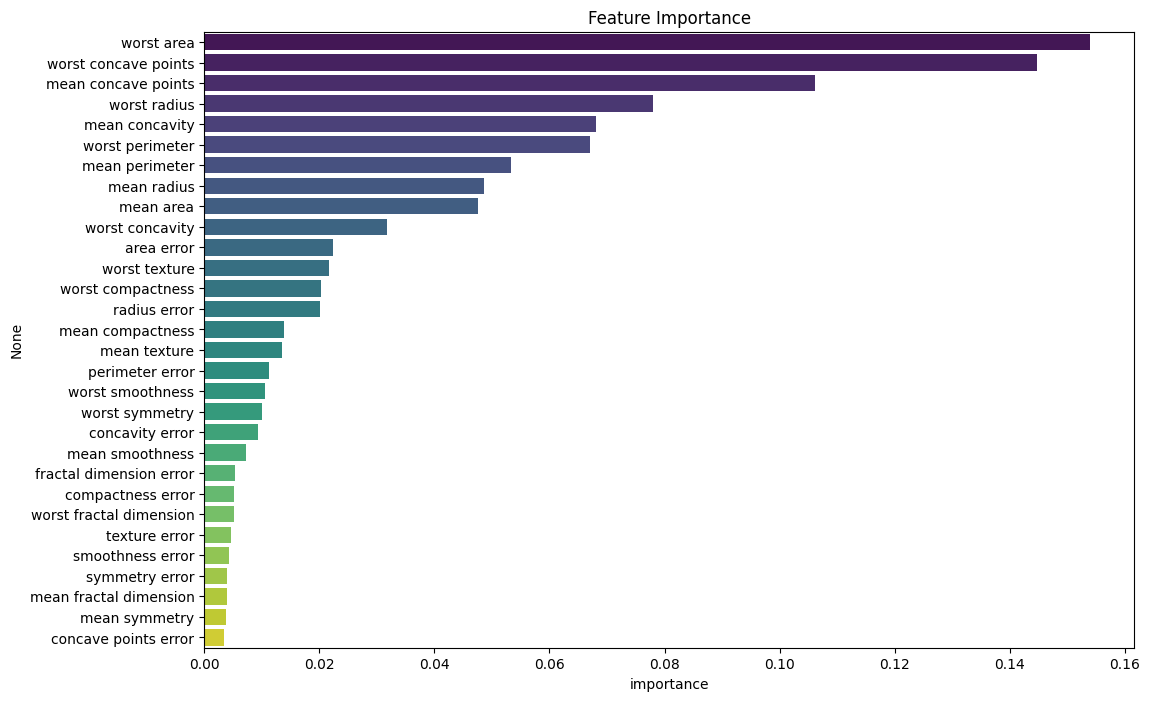

In [15]:
# Visualize Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.importance, y=feature_importance.index, palette="viridis")
plt.title("Feature Importance")
plt.show()

In [16]:
# Feature Selection
sfm = SelectFromModel(rf_classifier, threshold=0.05)
sfm.fit(X_train, y_train)
selected_features = cancer['feature_names'][sfm.get_support()]

In [17]:
# Display selected features
print("Selected Features:")
print(selected_features)

Selected Features:
['mean perimeter' 'mean concavity' 'mean concave points' 'worst radius'
 'worst perimeter' 'worst area' 'worst concave points']


In [18]:
# Transform the training and testing sets with selected features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Train the model with selected features
rf_classifier.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Predictions
y_pred = rf_classifier.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.956140350877193
Confusion Matrix:
[[40  3]
 [ 2 69]]
